### <a href='#section1'>Часть 1. Приоритизация гипотез.</a>

* Применение фреймворка ICE для приоритизации гипотез(отсортировать по убыванию приоритета).
* Применение фреймворка RICE для приоритизации гипотез.(отсортировать по убыванию приоритета).
* Объяснить изменинение приоритизации гипотез при применении RICE вместо ICE.

### <a href='#section2'>Часть 2. Анализ A/B-теста</a>


### Анализ A/B-теста:

### <a href='#section21'>1.График кумулятивной выручки по группам.</a>
### <a href='#section22'>2.График кумулятивного среднего чека по группам.</a>
### <a href='#section23'>3.График относительного изменения кумулятивного среднего чека группы B к группе A.</a>
### <a href='#section24'>4.График кумулятивной конверсии по группам.</a>
### <a href='#section25'>5.График относительного изменения кумулятивной конверсии группы B к группе A.</a>
### <a href='#section26'>6.Точечный график количества заказов по пользователям.</a>
### <a href='#section27'>7.Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.</a>
### <a href='#section28'>8.Точечный график стоимостей заказов.</a>
### <a href='#section29'>9.Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</a>
### <a href='#section210'>10.Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.</a> 
### <a href='#section211'>11.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</a>
### <a href='#section212'>12.Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.</a>
### <a href='#section213'>13.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.</a>
### <a href='#section214'>14.Принять решение по результатам теста и объяснить его.</a> 
   *Варианты решений:* 
   * 1.Остановить тест, зафиксировать победу одной из групп. 
   * 2.Остановить тест, зафиксировать отсутствие различий между группами. 
   * 3.Продолжить тест.

## <a id='section1'>Приоритизация гипотез</a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
import scipy.stats as stats
from scipy import stats as st
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [51]:
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

### Проверим данные на корректность

In [52]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [53]:
hypothesis.isna().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [54]:
hypothesis.duplicated().sum()

0

In [55]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [56]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [57]:
orders.duplicated().sum()

0

In [58]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [59]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [60]:
visitors.duplicated().sum()

0

In [61]:
#как видим надо привести в порядок даты в двух таблицах и названия столбцов
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### Применение фреймворка ICE для приоритизации гипотез(отсортировать по убыванию приоритета).

Формула для расчет ICE
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [62]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('ICE', ascending=False).head()

Hypothesis  Reach  Impact  \
8  Запустить акцию, дающую скидку на товар в день...      1       9   
0  Добавить два новых канала привлечения трафика,...      3      10   
7  Добавить форму подписки на все основные страни...     10       7   
6  Показать на главной странице баннеры с актуаль...      5       3   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   

   Confidence  Efforts   ICE  
8           9        5 16.20  
0           8        6 13.33  
7           8        5 11.20  
6           8        3  8.00  
2           7        3  7.00

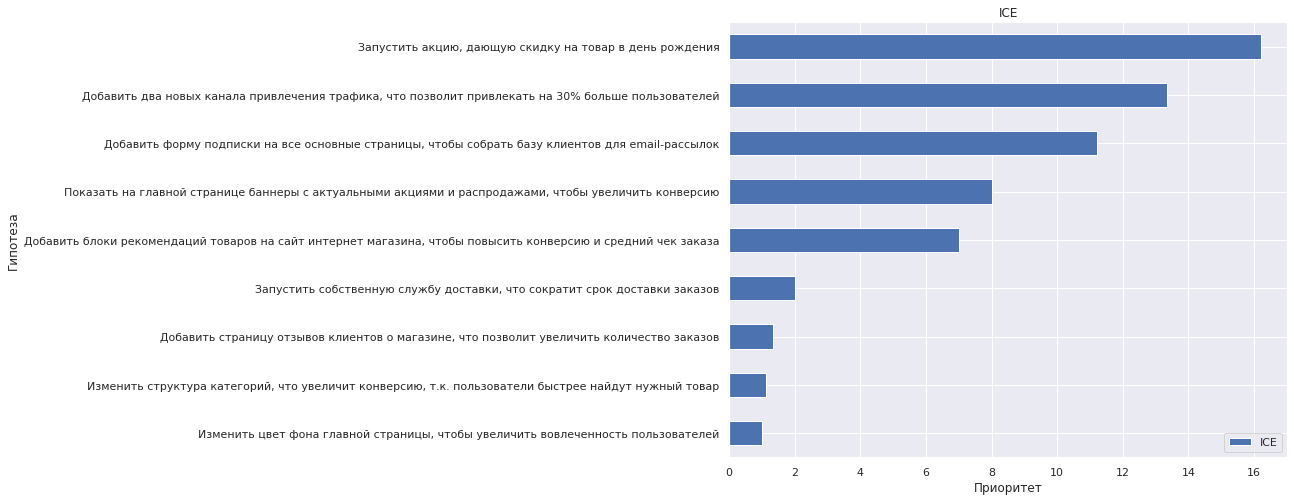

In [63]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

### Применение фреймворка RICE для приоритизации гипотез.(отсортировать по убыванию приоритета).

Формула для расчета RICE
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [64]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head()

Hypothesis  Reach  Impact  \
7  Добавить форму подписки на все основные страни...     10       7   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
0  Добавить два новых канала привлечения трафика,...      3      10   
6  Показать на главной странице баннеры с актуаль...      5       3   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   Confidence  Efforts   ICE   RICE  
7           8        5 11.20 112.00  
2           7        3  7.00  56.00  
0           8        6 13.33  40.00  
6           8        3  8.00  40.00  
8           9        5 16.20  16.20

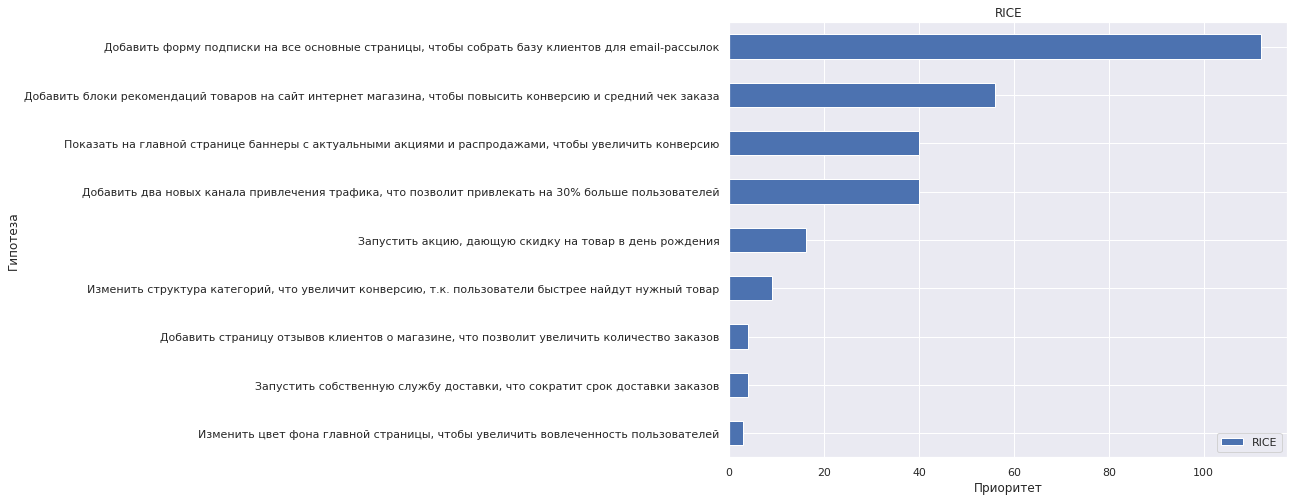

In [65]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

### *Как видим приоритет гипотез различается в двух расчетах, это произошло из-за того что RICE учитывать еще и охват пользователей по 10-бальной шкале.*

### <a id='section2'>Анализ A/B-теста</a>

### Подготовим данные для построения графиков

In [66]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [67]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [68]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']
cummulative.head()

date group  orders  buyers  revenue  visitors  average_check  \
0 2019-08-01     A      24      20   148579       719       6,190.79   
1 2019-08-01     B      21      20   101217       713       4,819.86   
2 2019-08-02     A      44      39   242401      1338       5,509.11   
3 2019-08-02     B      45      43   266748      1294       5,927.73   
4 2019-08-03     A      68      63   354874      1845       5,218.74   

   conversion  
0        0.03  
1        0.03  
2        0.03  
3        0.03  
4        0.04

### <a id='section21'>1.График кумулятивной выручки по группам.</a>

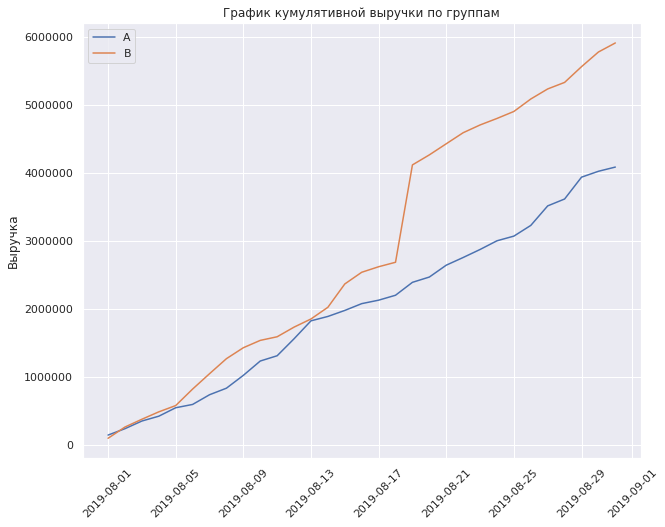

In [69]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### *У группы B виден резкий скачок, возможно это выброс. Группа А растет линейно.*

### <a id='section22'>2.График кумулятивного среднего чека по группам.</a>

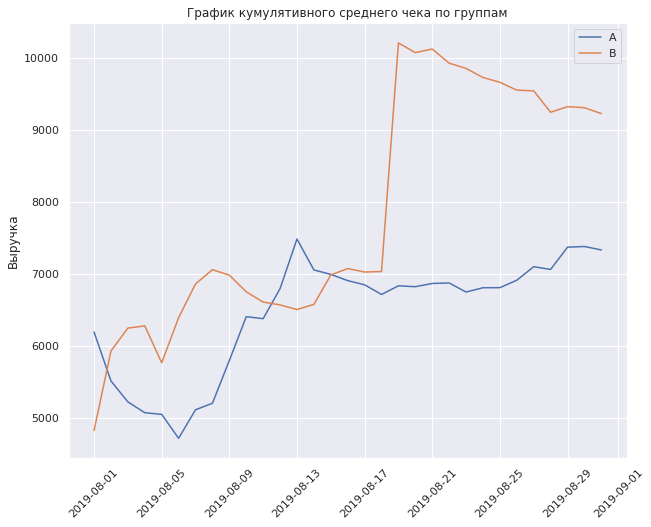

In [70]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### *Здесь также B делает резкий скачок, а затем и вовсе идет вниз.*

### <a id='section23'>3.График относительного изменения кумулятивного среднего чека группы B к группе A.</a>

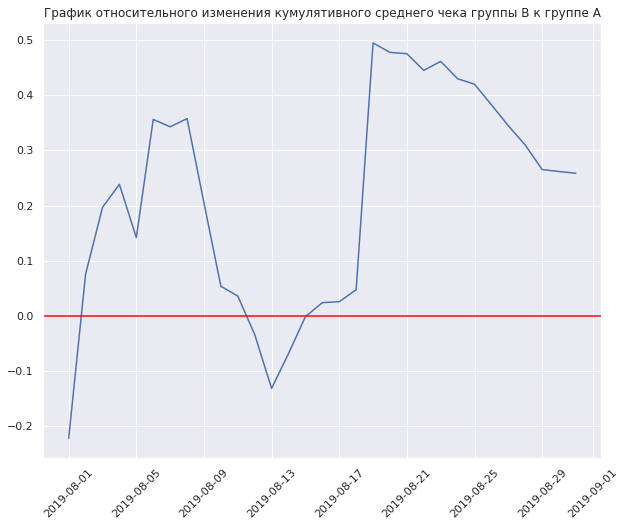

In [71]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

### *Как видим по этому в предыдущему графику, средний чек в группе A 13 августа сделал скачок и обошел группу B, затем все вернулось в прежнюю плоскость.*

### <a id='section24'>4.График кумулятивной конверсии по группам.</a>

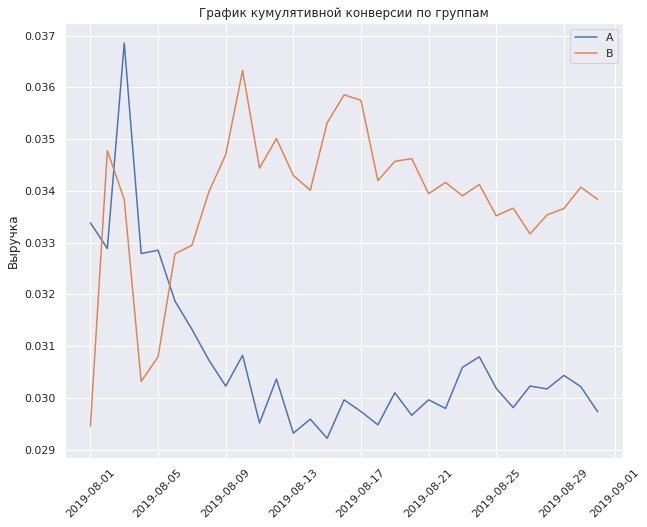

In [72]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### *У группы А видим резкий пик и затем такое же резкое снижение и стабилизацию в районе 0.03. У В группы было схожее с A начало графика, но затем случился опять скачок и стабилизация на уровне 0.033-0.034*

### <a id='section25'>5.График относительного изменения кумулятивной конверсии группы B к группе A.</a>

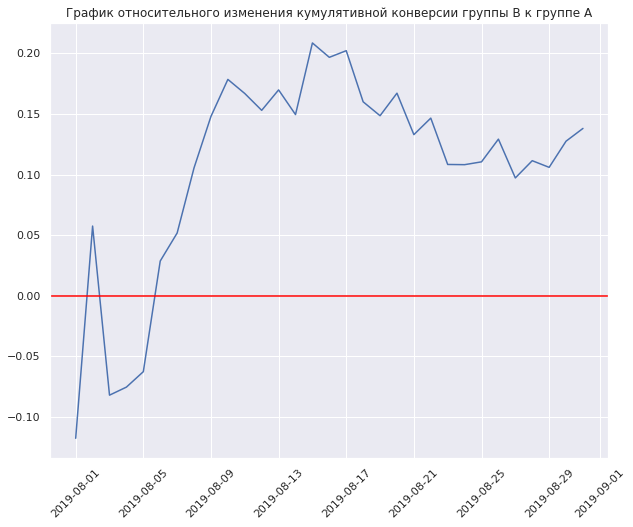

In [73]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

### *B-конверсия заметно лучше, но у нас небольшое количество дней теста.*

### <a id='section26'>6.Точечный график количества заказов по пользователям.</a>

In [74]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
orders_per_user.head()

visitorid  orders
0    5114589       1
1    6958315       1
2    8300375       2
3   11685486       1
4   39475350       1

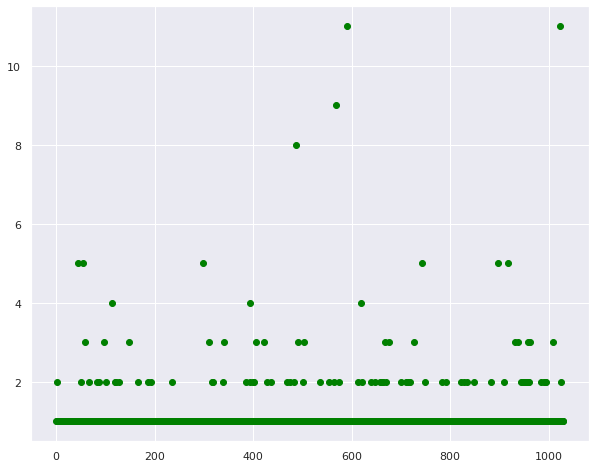

In [75]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='green')
plt.show()

### *Как видим в основном пользователи делают по 1 заказу, но есть небольшая группа постоянно покупающих.*

### <a id='section27'>7.Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.</a>

In [76]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


In [77]:
orders_per_user['orders'].max()

11

In [78]:
np.ptp(orders_per_user['orders'], axis=0)

10

In [79]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitorid'].to_list()

### *Все, что за 99 перцентилем — выглядит аномально.*

### <a id='section28'>8.Точечный график стоимостей заказов.</a>

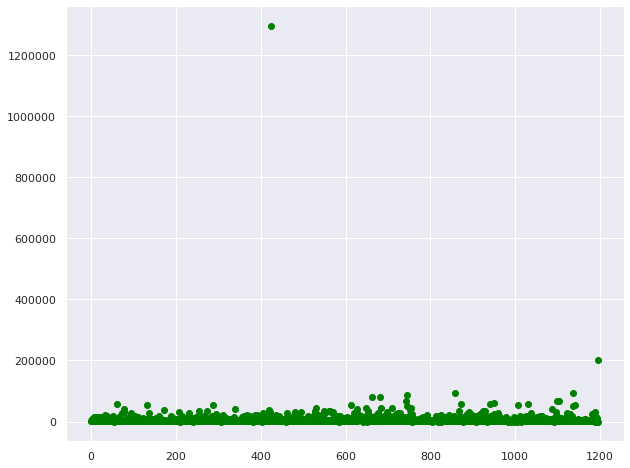

In [80]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='green')
plt.show()

### *На графике видно 2 явных выброса.*

### <a id='section29'>9.Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</a>

In [81]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [82]:
orders['revenue'].max()

1294500

In [83]:
np.ptp(orders['revenue'], axis=0)

1294450

### *Здесь также, все, что за 99 перцентилем — аномальные заказы.*

### <a id='section210'>10.Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.</a> 

In [84]:
conversion = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
conversion

group  orders  visitors  conversion
0     A     557     18736        0.03
1     B     640     18916        0.03

In [85]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B

alpha=0.05

purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])

p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]

combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Конверсия группы В больше конверсии группы А на {0:.2%}".format((p2-p1)/p1))     

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу
Конверсия группы В больше конверсии группы А на 13.81%


### <a id='section211'>11.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</a>

In [86]:
# Воспользуемся критерием Манна-Уитни, так как он позволяет провести тест, основанный на структурном подходе, или непараметрический. 
# У нас данные еще сырые, поэтому возможны выбросы, что сильно сдвинет параметрические результаты. 
# H0: Средний чек A НЕ ПРЕВОСХОДИТ средний чек группы B
# H1: Средний чек A ПРЕВОСХОДИТ средний чек группы B
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.3646454927716229
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [87]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [88]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

In [89]:
print(" Относительное изменение среднего чека в группе В к группе А {0:.2%}"\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

 Относительное изменение среднего чека в группе В к группе А 25.87%


### <a id='section212'>12.Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.</a>

In [90]:
# Очистим данные
orders_temp = orders[~orders['visitorid'].isin(outlaws_1p)]
conversion_clear = (orders_temp.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [91]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу


### *Как видим B-конверсия снова превышает конверсию А со статистической значимостью.*

### <a id='section213'>13.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.</a>

In [92]:
orders_clear = orders.query('revenue <= 58233')
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ средний чек группы B
# H1: Средний чек A ПРЕВОСХОДИТ средний чек группы B
alpha = 0.05

results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue

print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.31043134834237274
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [93]:
orders_clear[orders_clear['group']=='A']['revenue'].mean()

6470.587272727273

In [94]:
orders_clear[orders_clear['group']=='B']['revenue'].mean()

6592.692913385827

### *Как и по сырым данным, не получилось сделать вывод о различии, хотя стоит отметить, что средний чек в обоих группах после очистки значительно изменился.*

### Графики для очищенных данных

In [104]:
orders_clear = (orders_clear.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_clear['group_copy'] = orders_clear['group']
orders_clear =orders_clear.set_index(['date','group'])
orders_cumsum = orders_clear.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']
cummulative.head()

date group  orders  buyers  revenue  visitors  average_check  \
0 2019-08-01     A      24      20   148579       719       6,190.79   
1 2019-08-01     B      21      20   101217       713       4,819.86   
2 2019-08-02     A      44      39   242401      1338       5,509.11   
3 2019-08-02     B      45      43   266748      1294       5,927.73   
4 2019-08-03     A      68      63   354874      1845       5,218.74   

   conversion  
0        0.03  
1        0.03  
2        0.03  
3        0.03  
4        0.04

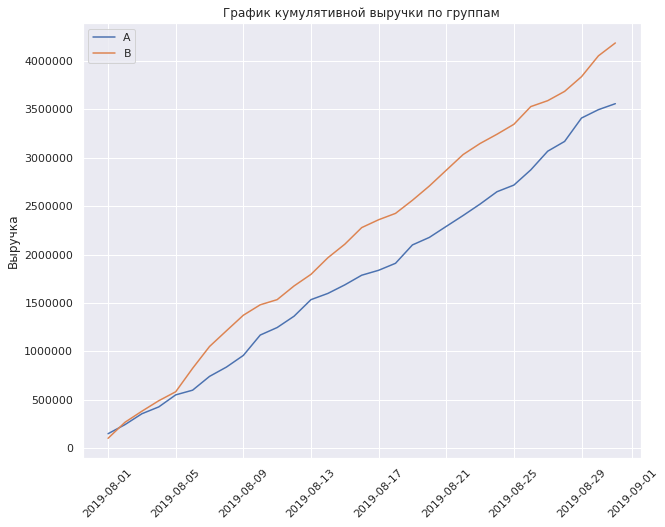

In [107]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

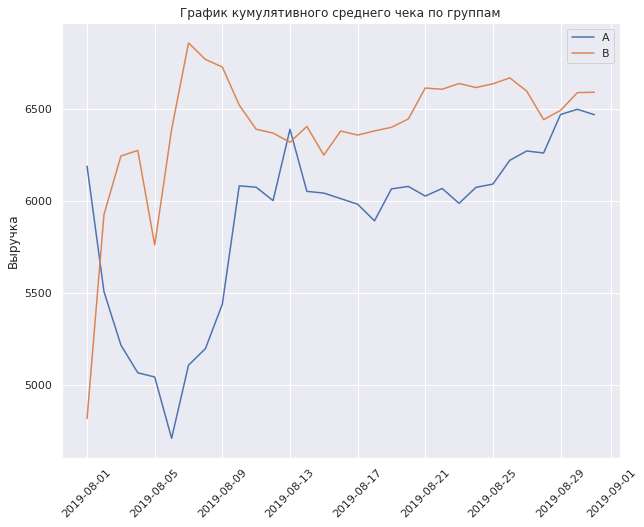

In [108]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

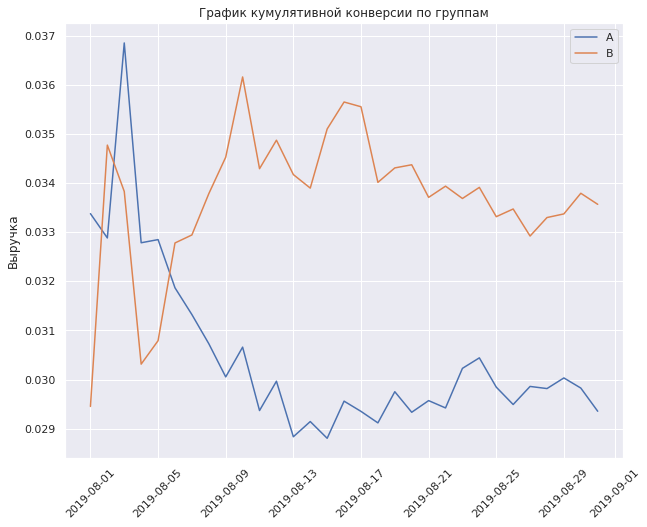

In [109]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Вывод
* В процессе предобработки была найдена и исправлена ошибка с типом данных в столбцах 'date' в таблицах orders и visitors
* При расчете были выявлены гипотезы с наибольшим приоритетом: "запуск акции, дающей скидку на товар в день рождения" и "добавление формы подписки на основных страницах"
* Тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. В то же время видим средний чек между группами в очищенных данных значительно не отличается.